In [1]:
# import pandas and raw data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sherphie/rawdata/master/loans.csv')

In [2]:
# 確認用
# ローデータの中身は？
df.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,-1
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,-1
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,-1
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,-1
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,-1


In [3]:
# 確認用
# ローデータの形は？　(m行,n列)
df.shape

(46508, 13)

In [4]:
# 特徴値(feature)のXと目標値(target)のyをローデータから分割
X = df.drop('safe_loans', axis=1)
y = df.safe_loans

In [5]:
X.shape

(46508, 12)

In [6]:
y.shape

(46508,)

In [7]:
X.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0


In [8]:
# sklearn初期化
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# ローデータはcategorical形なので数値に転換
d = defaultdict(LabelEncoder)
X_trans = X.apply(lambda x: d[x.name].fit_transform(x))

X_trans.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,2,13,1,1,3,97,0,1,1,1,107,0
1,5,26,0,5,2,552,9,1,1,1,349,0
2,1,9,1,1,3,1805,8,1,1,1,388,0
3,2,10,1,1,3,1005,2,0,1,1,952,0
4,1,6,0,4,3,703,8,0,1,1,583,0


In [9]:
# 交差検証のため、ローデータを訓練用と検証用の　「train」「test」の　二種類に分割
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state=1)

C:\Users\lu-f\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X_train.shape

(34881, 12)

In [11]:
X_test.shape

(11627, 12)

In [12]:
# データ用意完成、訓練用の「train」データつかって決定木生成
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

In [13]:
# 生成した決定木を可視化する
with open("safe-loans.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(X_train),
                              class_names = ['not safe', 'safe'],
                              rounded = True,
                              filled= True )

In [14]:
# 生成した決定木データ.dotをグラフの.pngに転換
from subprocess import check_call
check_call(['C:/Program Files (x86)/Graphviz2.38/bin/dot','-Tpng','safe-loans.dot','-o','safe-loans.png'])

0

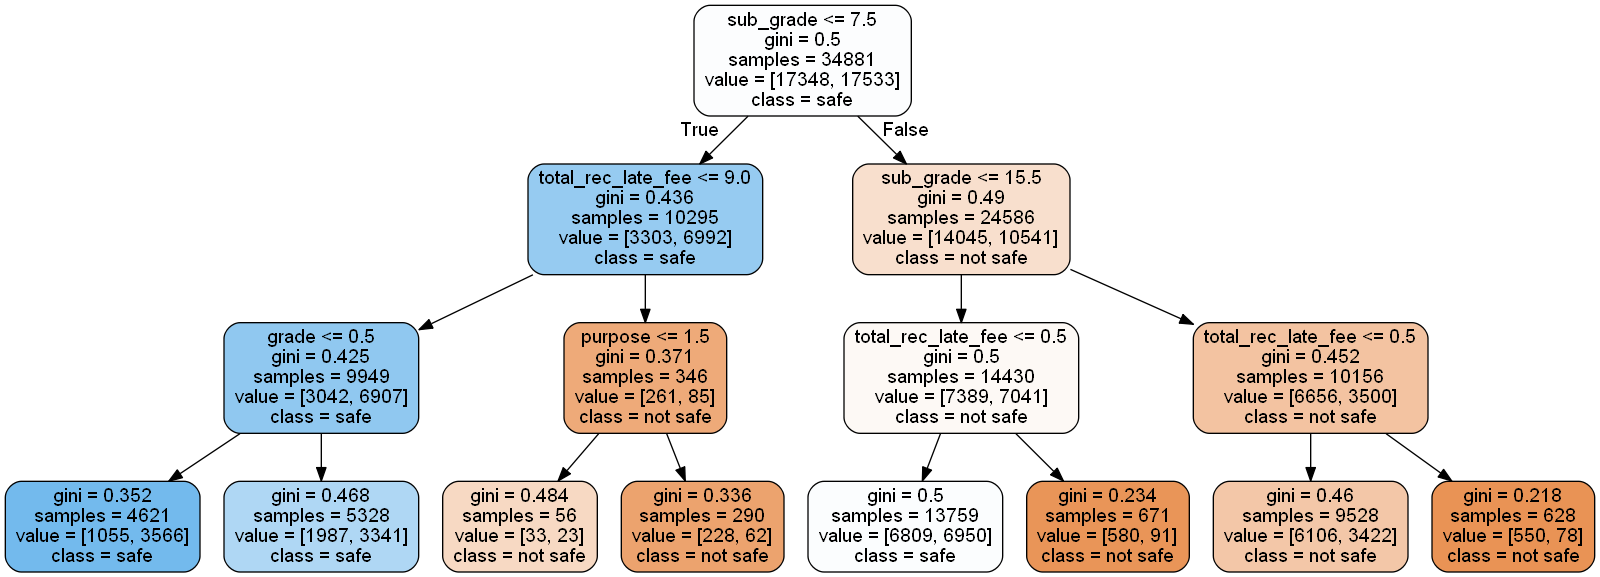

In [15]:
#　グラフ出力
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
img = Image.open("safe-loans.png")
draw = ImageDraw.Draw(img)
img.save('output.png')
PImage("output.png")

In [16]:
# 手動ランダム検証？　Xから適当にサンプル1本つかって先ほど生成した決定木を検証
test_rec = X_test.iloc[1,:]
clf.predict([test_rec])

array([1], dtype=int64)

In [17]:
# 目標値は？　yから答えを
y_test.iloc[1]

1

In [ ]:
# 交差検証　→　「test」データつかって決定木の
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))